Goal: predict t+5 magnitude of returns for banknifty using time lagged returns data from across the 4 indices

Returns were calculated here: https://colab.research.google.com/drive/1mCk90Vpqhn9XELjl7bSQwVzYype0S2T-?usp=sharing

In [50]:
import pandas as pd
from google.colab import drive

#Load 'all' CSV file
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/wealthnet_features_returns/banknifty.csv'

data = pd.read_csv(file_path)

data.dtypes

Mounted at /content/drive


Datetime                    object
Open                       float64
High                       float64
Low                        float64
Close                      float64
Index Name                  object
1_Min_Returns              float64
5_Min_Returns              float64
10_Min_Returns             float64
1_Min_Returns_Midcap       float64
5_Min_Returns_Midcap       float64
10_Min_Returns_Midcap      float64
1_Min_Returns_Finnifty     float64
5_Min_Returns_Finnifty     float64
10_Min_Returns_Finnifty    float64
1_Min_Returns_Nifty        float64
5_Min_Returns_Nifty        float64
10_Min_Returns_Nifty       float64
dtype: object

In [52]:
data['Target_t+5_Return'] = data['5_Min_Returns'].shift(-5)

data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['index', 'level_0'], axis=1, inplace=True)
# data.drop('Datetime', axis=1, inplace=True)
data.drop('Index Name', axis=1, inplace=True)
data.head(10)

,Datetime,Open,High,Low,Close,1_Min_Returns,5_Min_Returns,10_Min_Returns,1_Min_Returns_Midcap,5_Min_Returns_Midcap,10_Min_Returns_Midcap,1_Min_Returns_Finnifty,5_Min_Returns_Finnifty,10_Min_Returns_Finnifty,1_Min_Returns_Nifty,5_Min_Returns_Nifty,10_Min_Returns_Nifty,Target_t+5_Return
0,2023-01-02 09:26:00+05:30,43079.55,43086.25,43018.85,43018.85,-14.345187,-3.775988,-23.064453,-7.777778,0.000000,-18.867925,-13.718505,-12.535090,-23.884303,-9.017704,-4.469520,-11.579403,-3.219519
1,2023-01-02 09:27:00+05:30,43017.30,43026.90,42998.75,43023.60,1.104167,0.662471,-19.046205,-4.239408,-2.849835,-16.312421,-0.738284,-6.561628,-29.079551,-3.036217,-3.201775,-17.309288,-2.614844
2,2023-01-02 09:28:00+05:30,43023.50,43033.05,42985.20,42995.65,-6.496435,-8.226618,-18.989053,-4.310734,-11.047497,-20.061921,-4.192706,-12.251802,-25.208603,-3.009528,-7.148121,-14.919405,26.839925
3,2023-01-02 09:29:00+05:30,42992.65,43012.40,42973.65,42997.95,0.534938,-20.482196,-7.459903,-2.434529,-22.353039,-10.494784,0.712268,-19.219226,-15.775737,-1.021891,-16.077436,-6.210974,35.827289
4,2023-01-02 09:30:00+05:30,43000.85,43024.90,42982.90,42988.35,-2.232665,-21.424932,-15.723690,-3.896194,-22.638889,-18.341230,-3.745733,-21.670498,-20.961048,-4.143223,-20.213998,-12.970634,37.126338
5,2023-01-02 09:31:00+05:30,42983.70,43006.00,42965.20,43005.00,3.873142,-3.219519,-6.994291,11.066720,-3.822417,-3.822417,3.562419,-4.403335,-16.932906,4.891030,-6.320851,-10.787546,43.692594
6,2023-01-02 09:32:00+05:30,43003.10,43015.05,42985.85,43012.35,1.709104,-2.614844,-1.952546,-10.637336,-10.220612,-13.067534,-0.448441,-4.113599,-10.672527,-3.839100,-7.123471,-10.322965,41.302091
7,2023-01-02 09:33:00+05:30,43012.75,43126.75,43010.50,43111.05,22.946898,26.839925,18.591227,12.458241,6.538448,-4.516272,18.729852,18.809141,6.534295,8.952131,4.833266,-2.318309,24.796427
8,2023-01-02 09:34:00+05:30,43108.40,43162.00,43080.75,43152.00,9.498725,35.827289,15.271711,2.085375,11.062409,-11.315358,9.716049,27.829216,8.556505,5.852328,11.711510,-4.384755,22.397571
9,2023-01-02 09:35:00+05:30,43153.25,43153.60,43123.75,43147.95,-0.938543,37.126338,15.621863,2.918917,17.887718,-4.791667,0.552409,32.140935,10.400786,0.027589,15.888938,-4.357178,13.569590


In [53]:
#Splitting day into different trading sessions
import pandas as pd

# Convert Datetime to datetime if not already done
# data = data.iloc[:, 4:17]
data.drop(data.iloc[:, 1:5], inplace=True, axis=1)
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Set time ranges
time_ranges = {
    'morning_session': ('09:15:00', '10:30:00'),
    'midday_session': ('10:31:00', '14:00:00'),
    'afternoon_session': ('14:01:00', '20:00:00')
}

# Filtering the data
morning_df = data[(data['Datetime'].dt.time >= pd.to_datetime(time_ranges['morning_session'][0]).time()) &
                        (data['Datetime'].dt.time <= pd.to_datetime(time_ranges['morning_session'][1]).time())]

midday_df = data[(data['Datetime'].dt.time >= pd.to_datetime(time_ranges['midday_session'][0]).time()) &
                       (data['Datetime'].dt.time <= pd.to_datetime(time_ranges['midday_session'][1]).time())]

afternoon_df = data[(data['Datetime'].dt.time >= pd.to_datetime(time_ranges['afternoon_session'][0]).time()) &
                          (data['Datetime'].dt.time <= pd.to_datetime(time_ranges['afternoon_session'][1]).time())]

# Now we have three dataframes: morning_df, midday_df, and afternoon_df
morning_df
# midday_df
# afternoon_df

,Datetime,1_Min_Returns,5_Min_Returns,10_Min_Returns,1_Min_Returns_Midcap,5_Min_Returns_Midcap,10_Min_Returns_Midcap,1_Min_Returns_Finnifty,5_Min_Returns_Finnifty,10_Min_Returns_Finnifty,1_Min_Returns_Nifty,5_Min_Returns_Nifty,10_Min_Returns_Nifty,Target_t+5_Return
0,2023-01-02 09:26:00+05:30,-14.345187,-3.775988,-23.064453,-7.777778,0.000000,-18.867925,-13.718505,-12.535090,-23.884303,-9.017704,-4.469520,-11.579403,-3.219519
1,2023-01-02 09:27:00+05:30,1.104167,0.662471,-19.046205,-4.239408,-2.849835,-16.312421,-0.738284,-6.561628,-29.079551,-3.036217,-3.201775,-17.309288,-2.614844
2,2023-01-02 09:28:00+05:30,-6.496435,-8.226618,-18.989053,-4.310734,-11.047497,-20.061921,-4.192706,-12.251802,-25.208603,-3.009528,-7.148121,-14.919405,26.839925
3,2023-01-02 09:29:00+05:30,0.534938,-20.482196,-7.459903,-2.434529,-22.353039,-10.494784,0.712268,-19.219226,-15.775737,-1.021891,-16.077436,-6.210974,35.827289
4,2023-01-02 09:30:00+05:30,-2.232665,-21.424932,-15.723690,-3.896194,-22.638889,-18.341230,-3.745733,-21.670498,-20.961048,-4.143223,-20.213998,-12.970634,37.126338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145061,2024-04-30 10:26:00+05:30,5.574035,4.109239,-0.030277,-0.314707,-5.482062,-12.752238,2.992473,3.335237,1.964322,-0.087992,-3.298632,-4.287797,0.151384
145062,2024-04-30 10:27:00+05:30,6.368218,16.831292,9.752424,-2.697575,-2.697575,-13.473336,4.704313,14.858773,8.978568,3.519702,4.906264,0.329867,-7.090346
145063,2024-04-30 10:28:00+05:30,3.620817,17.948208,16.369984,-3.103048,-8.360340,-14.329865,2.739088,14.351202,13.596053,0.659712,3.563478,0.725688,-9.759560
145064,2024-04-30 10:29:00+05:30,-5.877917,12.777778,8.400366,0.809742,0.134948,-12.309904,-4.700814,9.506399,7.059517,-2.308839,3.652341,-1.737226,-0.090793


In [54]:
import numpy as np

def scale_data(dataset_features):
      dataset_features = dataset_features.copy()
      # dataset_features.reset_index(inplace=True)
      dataset_features.drop('Datetime', axis=1, inplace=True)

      #Define the columns that are features
      features = dataset_features.columns.drop(['Target_t+5_Return'])

      #Calculating std dev and mean for target column seperately as well, need to check with Puneet if scaling should be same as test data or not
      features = dataset_features.columns

      #Specify rolling window
      lookback_period = 30

      dataframe_scaled = pd.DataFrame()

      #Calculate rolling mean and std, and scale the features
      for feature in features:
          dataframe_scaled[f'{feature}_mean'] = dataset_features[feature].rolling(window=lookback_period, min_periods=lookback_period).mean()
          dataframe_scaled[f'{feature}_std'] = dataset_features[feature].rolling(window=lookback_period, min_periods=lookback_period).std()

          #Handle cases where standard deviation might be zero (avoid division by 0)
          dataframe_scaled[f'{feature}_std'].replace(0, np.finfo(float).eps, inplace=True)

          #Scale the features
          dataframe_scaled[f'{feature}_scaled'] = (dataset_features[feature] - dataframe_scaled[f'{feature}_mean']) / dataframe_scaled[f'{feature}_std']

          #Drop std dev and mean columns
          dataframe_scaled.drop([f'{feature}_mean', f'{feature}_std'], axis=1, inplace=True)

      dataframe_scaled.dropna(inplace=True)
      # print(dataframe_scaled)

      return dataframe_scaled

morning_df_scaled = scale_data(morning_df)
midday_df_scaled = scale_data(midday_df)
afternoon_df_scaled = scale_data(afternoon_df)

# morning_df.columns
len(morning_df_scaled)
# morning_df_scaled.head(10)
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range=(0,1))
# data_set_scaled = sc.fit_transform(dataset_features)
# print(data_set_scaled.shape)

29462

In [55]:
lookback_period = 30

#First 'lookback' rows from each scaled session dataframe is lost while calculating std dev. Drop from original df to match datetime
morning_df_copy = morning_df.copy()
midday_df_copy = midday_df.copy()
afternoon_df_copy = afternoon_df.copy()

# Drop the first 'lookback' rows from each DataFrame
morning_df_copy = morning_df_copy.iloc[lookback_period-1:, :]
midday_df_copy = midday_df_copy.iloc[lookback_period-1:, :]
afternoon_df_copy = afternoon_df_copy.iloc[lookback_period-1:, :]

# morning_df_copy.drop(index=morning_df_copy.index[0], axis=0, inplace=True)
# midday_df_copy.drop(index=midday_df_copy.index[0], axis=0, inplace=True)
# afternoon_df_copy.drop(index=afternoon_df_copy.index[0], axis=0, inplace=True)




In [75]:
# len(morning_df_copy)
# len(morning_df_scaled)

morning_df_scaled['Datetime'] = morning_df_copy['Datetime']
midday_df_scaled['Datetime'] = midday_df_copy['Datetime']
afternoon_df_scaled['Datetime'] = afternoon_df_copy['Datetime']

In [76]:
# Merge the three session DataFrames
merged_df = pd.concat([morning_df_scaled, midday_df_scaled, afternoon_df_scaled])

# Sort the merged DataFrame by timestamp
merged_df.sort_values(by='Datetime', inplace=True)

#Not using merged dataframe for now, instead running the model on individual session dataframes.

# merged_df

In [77]:
import pandas as pd

# merged_df_copy = merged_df.copy()
# Keep only rows where the absolute value of '5_Mins_Returns_Scaled' is greater than or equal to 1, to reduce noisy data
# filtered_df = merged_df_copy[merged_df_copy['5_Min_Returns_scaled'].abs() >= 1].copy()

filtered_df_morning = morning_df_scaled[morning_df_scaled['5_Min_Returns_scaled'].abs() >= 1].copy()
filtered_df_midday = midday_df_scaled[midday_df_scaled['5_Min_Returns_scaled'].abs() >= 1].copy()
filtered_df_afternoon = afternoon_df_scaled[afternoon_df_scaled['5_Min_Returns_scaled'].abs() >= 1].copy()



In [78]:
# filtered_df.drop('Datetime', axis=1, inplace=True)

filtered_df_morning_descaled = pd.DataFrame(index=filtered_df_morning.index)
filtered_df_midday_descaled = pd.DataFrame(index=filtered_df_midday.index)
filtered_df_afternoon_descaled = pd.DataFrame(index=filtered_df_afternoon.index)

#Using original returns in basis points, rather than scaled returns, in prediction for t+5 (as suggested by Puneet)
filtered_df_morning_descaled = morning_df.loc[filtered_df_morning.index]
filtered_df_midday_descaled = midday_df.loc[filtered_df_midday.index]
filtered_df_afternoon_descaled = afternoon_df.loc[filtered_df_afternoon.index]

# filtered_df_midday_descaled.loc[midday_df_copy.index] = midday_df_copy[:]
# filtered_df_afternoon_descaled.loc[afternoon_df_copy.index] = afternoon_df_copy[:]

In [79]:
import pandas as pd

# Create a boolean mask to filter out rows between 9:15 AM and 9:45 AM
mask_morning = ((filtered_df_morning_descaled['Datetime'].dt.time >= pd.to_datetime('09:15').time()) &
         (filtered_df_morning_descaled['Datetime'].dt.time <= pd.to_datetime('09:45').time()))

# Apply the mask to filter the DataFrame
filtered_df_morning_descaled = filtered_df_morning_descaled[mask_morning]


# Create a boolean mask to filter out rows between 10:30 AM and 11:00 AM
mask_midday = ((filtered_df_midday_descaled['Datetime'].dt.time >= pd.to_datetime('10:31').time()) &
         (filtered_df_midday_descaled['Datetime'].dt.time <= pd.to_datetime('11:00').time()))

# Apply the mask to filter the DataFrame
filtered_df_midday_descaled = filtered_df_midday_descaled[mask_midday]

# Create a boolean mask to filter out rows between 14:00 PM and 14:30 PM
mask_afternoon = ((filtered_df_afternoon_descaled['Datetime'].dt.time >= pd.to_datetime('14:01').time()) &
         (filtered_df_afternoon_descaled['Datetime'].dt.time <= pd.to_datetime('14:30').time()))

# Apply the mask to filter the DataFrame
filtered_df_afternoon_descaled = filtered_df_afternoon_descaled[mask_afternoon]

print(filtered_df_afternoon_descaled)



                        Datetime  1_Min_Returns  5_Min_Returns  \
657    2023-01-03 14:08:00+05:30      -3.269415      -2.014857   
658    2023-01-03 14:09:00+05:30      -0.069095      -2.164515   
659    2023-01-03 14:10:00+05:30      -2.844419      -2.637189   
661    2023-01-03 14:12:00+05:30      -1.071125      -5.802060   
662    2023-01-03 14:13:00+05:30      -2.706896      -5.239684   
...                          ...            ...            ...   
145277 2024-04-30 14:02:00+05:30      19.689726      63.778779   
145278 2024-04-30 14:03:00+05:30       0.010026      63.047657   
145279 2024-04-30 14:04:00+05:30      -4.381374      55.392219   
145280 2024-04-30 14:05:00+05:30       7.372360      43.750680   
145287 2024-04-30 14:12:00+05:30     -10.667180     -19.102570   

        10_Min_Returns  1_Min_Returns_Midcap  5_Min_Returns_Midcap  \
657          -2.118456             -0.902064              1.041045   
658          -2.199047              2.914622              3.678257 

In [80]:
filtered_df_morning_descaled.drop('Datetime', axis=1, inplace=True)
filtered_df_midday_descaled.drop('Datetime', axis=1, inplace=True)
filtered_df_afternoon_descaled.drop('Datetime', axis=1, inplace=True)
# morning_df_copy

In [81]:
correlation_matrix = filtered_df_morning_descaled.corr()
correlation_matrix

,1_Min_Returns,5_Min_Returns,10_Min_Returns,1_Min_Returns_Midcap,5_Min_Returns_Midcap,10_Min_Returns_Midcap,1_Min_Returns_Finnifty,5_Min_Returns_Finnifty,10_Min_Returns_Finnifty,1_Min_Returns_Nifty,5_Min_Returns_Nifty,10_Min_Returns_Nifty,Target_t+5_Return
1_Min_Returns,1.000000,0.469678,0.427460,0.727919,0.358599,0.304996,0.969296,0.448761,0.404672,0.890542,0.428065,0.378631,0.001832
5_Min_Returns,0.469678,1.000000,0.907086,0.334407,0.750828,0.642200,0.460933,0.974096,0.875705,0.409137,0.907751,0.799714,-0.064338
10_Min_Returns,0.427460,0.907086,1.000000,0.307117,0.692211,0.696701,0.419597,0.889412,0.965311,0.371281,0.830245,0.874142,-0.103661
1_Min_Returns_Midcap,0.727919,0.334407,0.307117,1.000000,0.462089,0.401506,0.704444,0.319767,0.291730,0.815055,0.376550,0.336021,0.017736
5_Min_Returns_Midcap,0.358599,0.750828,0.692211,0.462089,1.000000,0.877454,0.348323,0.727240,0.664358,0.380654,0.829728,0.747042,-0.010667
10_Min_Returns_Midcap,0.304996,0.642200,0.696701,0.401506,0.877454,1.000000,0.299130,0.630104,0.679157,0.331276,0.725087,0.787632,-0.034289
1_Min_Returns_Finnifty,0.969296,0.460933,0.419597,0.704444,0.348323,0.299130,1.000000,0.466506,0.422858,0.894193,0.432283,0.383840,0.002926
5_Min_Returns_Finnifty,0.448761,0.974096,0.889412,0.319767,0.727240,0.630104,0.466506,1.000000,0.908338,0.403753,0.908513,0.808870,-0.061555
10_Min_Returns_Finnifty,0.404672,0.875705,0.965311,0.291730,0.664358,0.679157,0.422858,0.908338,1.000000,0.366110,0.826110,0.882523,-0.097974
1_Min_Returns_Nifty,0.890542,0.409137,0.371281,0.815055,0.380654,0.331276,0.894193,0.403753,0.366110,1.000000,0.459753,0.413269,0.015614


In [82]:
import numpy as np

# dataset_features = dataset_features.to_numpy()

# IMPORTANT LINE
# dataset_scaled = filtered_df.to_numpy()

dataset_scaled = filtered_df_midday_descaled.to_numpy()

# dataset_scaled = midday_df_scaled.drop('Datetime', axis=1).to_numpy()
# dataset_scaled = afternoon_df_scaled.drop('Datetime', axis=1).to_numpy(

# print(dataset_scaled)
# print(dataset_scaled.shape)


#multiple features from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 1
# backcandles is the number of previous minutes of data you want to base the prediction on, testing with previous 5 minutes of data

# print(dataset_features.shape[0])

print(dataset_scaled.shape[0])

# The correct range should be based on the number of features you want to extract, which is 12 (from column 4 to 16)- not using OHLC numbers. Used to be 13 here.
for j in range(12):
    X.append([])
    for i in range(backcandles, dataset_scaled.shape[0]):
        X[j].append(dataset_scaled[i-backcandles:i, j]) # Also adjusted the column index here to ignore the OHLC numbers, since we only want the 13 features for returns, not including target?

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)

# Choose -1 for last column, ...
X, yi =np.array(X), np.array(dataset_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

3837
[[[ 0.          3.42266844 -3.00586662 ...  1.398448    9.68747599
    7.10597506]]

 [[-0.50724905 -7.13134462 -6.84352296 ...  0.19200123 -1.67284155
    5.680867  ]]

 [[-0.23057945 -7.84525155 -7.61502314 ...  0.08228466 -2.71463435
    4.96693285]]

 ...

 [[-3.56869948 -9.65179001 -6.04714353 ... -4.02168634 -7.49136077
   -3.2967033 ]]

 [[ 1.02863643 -7.19453457 -3.79000929 ... -0.52764648 -8.47956557
   -4.30748403]]

 [[ 3.2065955  -9.66782949 -0.81644584 ...  1.71494154 -9.09254631
   -3.97727897]]]
(3836, 1, 12)
[[ -1.7062879 ]
 [  2.39808153]
 [  0.27668194]
 ...
 [ -1.08903244]
 [ -5.03012024]
 [-14.29877997]]
(3836, 1)


In [83]:
filtered_df_midday_descaled.shape

(3837, 13)

In [84]:
#split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

3068
(3068, 1, 12)
(768, 1, 12)
(3068, 1)
(768, 1)
[[-1.7062879 ]
 [ 2.39808153]
 [ 0.27668194]
 ...
 [ 0.033051  ]
 [ 2.84318512]
 [ 2.40238122]]


In [98]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 12), name='lstm_input') #13 is the number of feature columns
inputs = LSTM(20, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('relu', name='output')(inputs)
# tried with relu activation, output was only 0, check in meeting about hyperparameter tuning

model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=10, shuffle=False, validation_split = 0.1)

Epoch 1/10
185/185 [==============================] - 4s 8ms/step - loss: 52.6224 - val_loss: 88.6532
Epoch 2/10
185/185 [==============================] - 1s 5ms/step - loss: 52.5326 - val_loss: 88.6669
Epoch 3/10
185/185 [==============================] - 1s 5ms/step - loss: 52.4587 - val_loss: 88.6933
Epoch 4/10
185/185 [==============================] - 1s 6ms/step - loss: 52.4010 - val_loss: 88.6657
Epoch 5/10
185/185 [==============================] - 1s 5ms/step - loss: 52.3331 - val_loss: 88.6348
Epoch 6/10
185/185 [==============================] - 1s 6ms/step - loss: 52.2616 - val_loss: 88.5827
Epoch 7/10
185/185 [==============================] - 1s 6ms/step - loss: 52.2084 - val_loss: 88.5602
Epoch 8/10
185/185 [==============================] - 1s 5ms/step - loss: 52.1484 - val_loss: 88.5746
Epoch 9/10
185/185 [==============================] - 1s 3ms/step - loss: 52.0854 - val_loss: 88.5637
Epoch 10/10
185/185 [==============================] - 1s 3ms/step - loss: 52.0324

In [92]:
#Run model Prediction
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)

# for i in range(100):
#     print(y_pred[i], y_test[i])

24/24 [==============================] - 0s 2ms/step


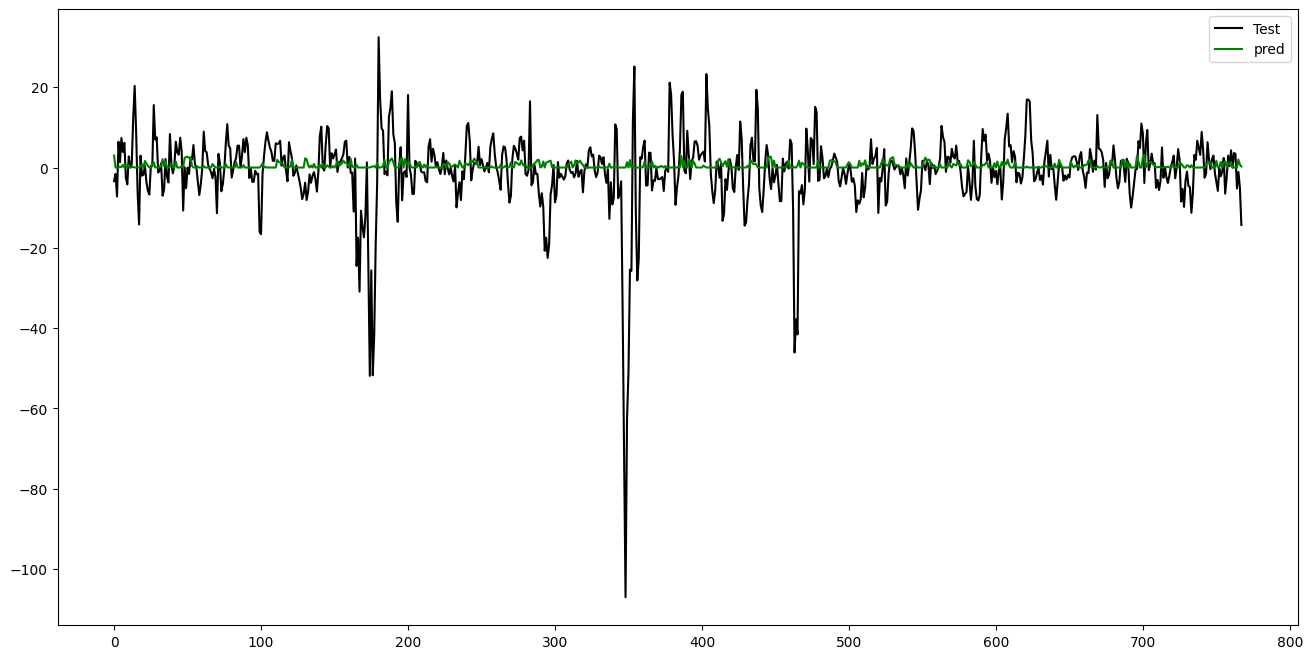

In [93]:
#Plot, currently being plotted with reference to scaled values
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
# plt.plot(y_train, color='red', label = 'Train')
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# correlation = np.corrcoef(y_test, y_pred)[0, 1]

print(mse)
# print(rmse)
# print(correlation)

81.64452013914047


In [ ]:
# import pandas as pd

# list = y_test.tolist()
# df = pd.DataFrame(list)

# # print(df.head())


# # Finding duplicates in 'Column'
# duplicates = df[df.duplicated(0, keep=False)]

# # Displaying the row indices of the duplicates
# print("Duplicate values found at row indices:")
# print(duplicates.index.tolist())


In [ ]:
#Abandoned code, to be worked on later if time permits. Switching to alternate strategy to explore for now.